In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Load Data**

In [15]:
df = pd.read_csv('./mldata.csv')
df.head()

Logical quotient rating  hackathons  coding skills rating  \
0                        5           0                     6   
1                        7           6                     4   
2                        2           3                     9   
3                        2           6                     3   
4                        2           0                     3   

   public speaking points self-learning capability? Extra-courses did  \
0                       2                       yes                no   
1                       3                        no               yes   
2                       1                        no               yes   
3                       5                        no               yes   
4                       4                       yes                no   

         certifications          workshops reading and writing skills  \
0  information security            testing                       poor   
1     shell programming            testing                  excellent   
2  information security            testing                  excellent   
3         r programming  database security                  excellent   
4         distro making   game development                  excellent   

  memory capability score   Interested subjects   interested career area   \
0                    poor           programming                   testing   
1                  medium            Management          system developer   
2                    poor      data engineering  Business process analyst   
3                    poor              networks                   testing   
4                  medium  Software Engineering          system developer   

  Type of company want to settle in? Taken inputs from seniors or elders  \
0                                BPA                                  no   
1                     Cloud Services                                 yes   
2                product development                                 yes   
3  Testing and Maintainance Services                                 yes   
4                                BPA                                  no   

  Interested Type of Books Management or Technical hard/smart worker  \
0                   Series              Management      smart worker   
1          Autobiographies               Technical       hard worker   
2                   Travel               Technical      smart worker   
3                    Guide              Management      smart worker   
4                   Health               Technical       hard worker   

  worked in teams ever? Introvert      Suggested Job Role  
0                   yes        no  Applications Developer  
1                    no       yes  Applications Developer  
2                    no        no  Applications Developer  
3                   yes       yes  Applications Developer  
4                   yes        no  Applications Developer

In [16]:
print('The shape of our training set: %s professionals and %s features'%(df.shape[0],df.shape[1]))

The shape of our training set: 6901 professionals and 20 features


## **Data Preprocessing** 

In [17]:
print("Columns in our dataset: " , df.columns)

Columns in our dataset:  Index(['Logical quotient rating', 'hackathons', 'coding skills rating',
       'public speaking points', 'self-learning capability?',
       'Extra-courses did', 'certifications', 'workshops',
       'reading and writing skills', 'memory capability score',
       'Interested subjects', 'interested career area ',
       'Type of company want to settle in?',
       'Taken inputs from seniors or elders', 'Interested Type of Books',
       'Management or Technical', 'hard/smart worker', 'worked in teams ever?',
       'Introvert', 'Suggested Job Role'],
      dtype='object')


In [18]:
print("List of Numerical features: \n" , df.select_dtypes(include=np.number).columns.tolist())
print("\n\nList of Categorical features: \n" , df.select_dtypes(include=['object']).columns.tolist())

List of Numerical features: 
 ['Logical quotient rating', 'hackathons', 'coding skills rating', 'public speaking points']


List of Categorical features: 
 ['self-learning capability?', 'Extra-courses did', 'certifications', 'workshops', 'reading and writing skills', 'memory capability score', 'Interested subjects', 'interested career area ', 'Type of company want to settle in?', 'Taken inputs from seniors or elders', 'Interested Type of Books', 'Management or Technical', 'hard/smart worker', 'worked in teams ever?', 'Introvert', 'Suggested Job Role']


In [19]:
#Checking missing values
df.isnull().sum(axis=0)

Logical quotient rating                0
hackathons                             0
coding skills rating                   0
public speaking points                 0
self-learning capability?              0
Extra-courses did                      0
certifications                         0
workshops                              0
reading and writing skills             0
memory capability score                0
Interested subjects                    0
interested career area                 0
Type of company want to settle in?     0
Taken inputs from seniors or elders    0
Interested Type of Books               0
Management or Technical                0
hard/smart worker                      0
worked in teams ever?                  0
Introvert                              0
Suggested Job Role                     0
dtype: int64

In [20]:
#Checking distinct values

categorical_col = df[['self-learning capability?', 'Extra-courses did','reading and writing skills', 'memory capability score', 
                      'Taken inputs from seniors or elders', 'Management or Technical', 'hard/smart worker', 'worked in teams ever?', 
                      'Introvert', 'interested career area ']]
for i in categorical_col:
    print(df[i].value_counts(), end="\n\n")

yes    3496
no     3405
Name: self-learning capability?, dtype: int64

no     3529
yes    3372
Name: Extra-courses did, dtype: int64

excellent    2328
medium       2315
poor         2258
Name: reading and writing skills, dtype: int64

medium       2317
excellent    2303
poor         2281
Name: memory capability score, dtype: int64

yes    3501
no     3400
Name: Taken inputs from seniors or elders, dtype: int64

Management    3461
Technical     3440
Name: Management or Technical, dtype: int64

smart worker    3523
hard worker     3378
Name: hard/smart worker, dtype: int64

no     3470
yes    3431
Name: worked in teams ever?, dtype: int64

yes    3544
no     3357
Name: Introvert, dtype: int64

system developer            1178
security                    1177
Business process analyst    1154
developer                   1145
testing                     1128
cloud computing             1119
Name: interested career area , dtype: int64



<Axes: xlabel='Suggested Job Role', ylabel='count'>

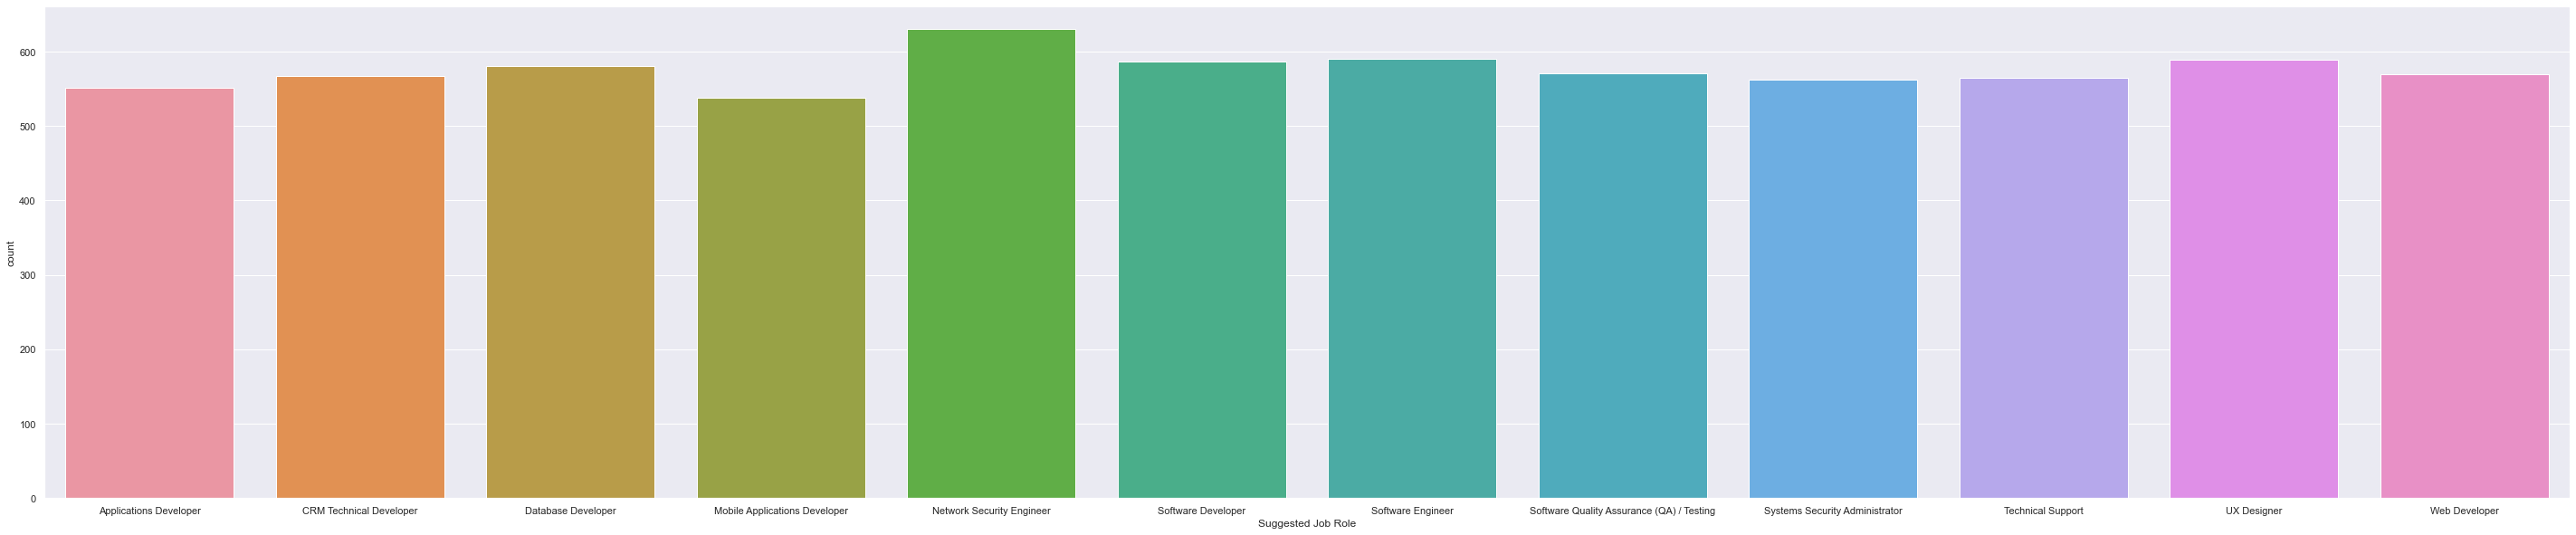

In [21]:
# Checking data balancing

sns.set(rc={'figure.figsize':(50,10)})
sns.countplot(x = df["Suggested Job Role"])

## **EDA**

<Axes: >

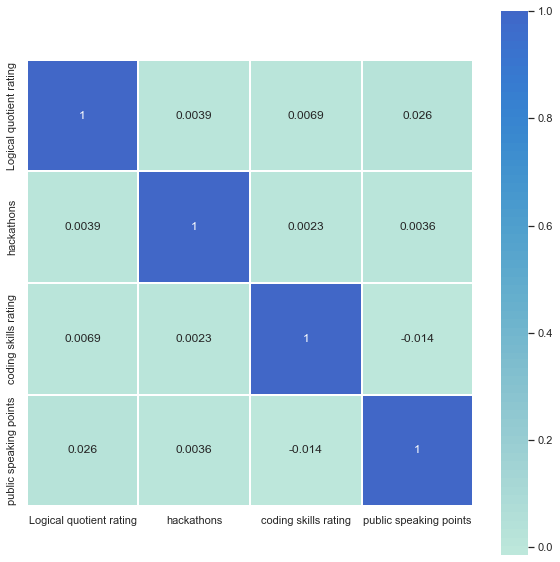

In [22]:
#corelation between numerical features

corr = df[['Logical quotient rating', 'hackathons', 
           'coding skills rating', 'public speaking points']].corr()
f,axes = plt.subplots(1,1,figsize = (10,10))
sns.heatmap(corr,square=True,annot = True,linewidth = .4,center = 2,ax = axes)

In [23]:
print(df["Interested subjects"].value_counts())

Software Engineering     731
IOT                      722
cloud computing          721
programming              716
networks                 713
Computer Architecture    703
data engineering         672
hacking                  663
Management               644
parallel computing       616
Name: Interested subjects, dtype: int64


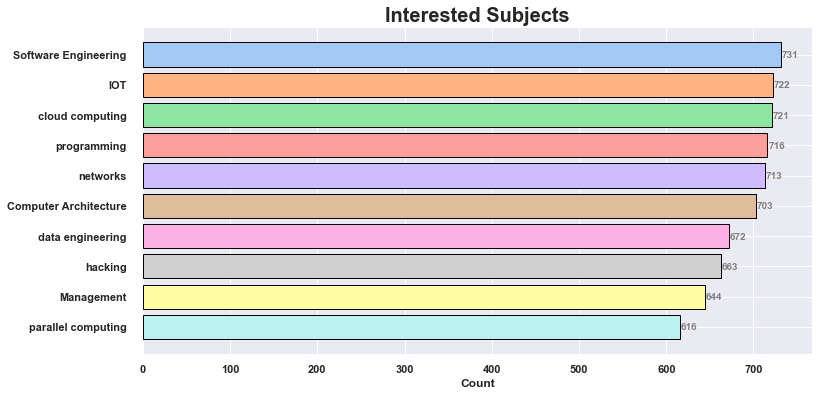

In [44]:
# Figure Size
fig, ax = plt.subplots(figsize=(12,6))

# Horizontal Bar Plot
title_cnt=df["Interested subjects"].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('pastel',len(title_cnt)))

# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Interested Subjects',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()

In [45]:
print(df["Interested Type of Books"].value_counts())

Guide                    405
Health                   401
Self help                377
Horror                   377
Biographies              219
Science fiction          218
Satire                   212
Childrens                212
Autobiographies          210
Prayer books             207
Fantasy                  205
Journals                 203
Trilogy                  203
Anthology                202
Encyclopedias            201
Drama                    201
Mystery                  200
History                  199
Science                  198
Dictionaries             198
Diaries                  197
Religion-Spirituality    197
Action and Adventure     193
Poetry                   193
Cookbooks                186
Comics                   186
Art                      186
Travel                   186
Series                   180
Math                     176
Romance                  173
Name: Interested Type of Books, dtype: int64


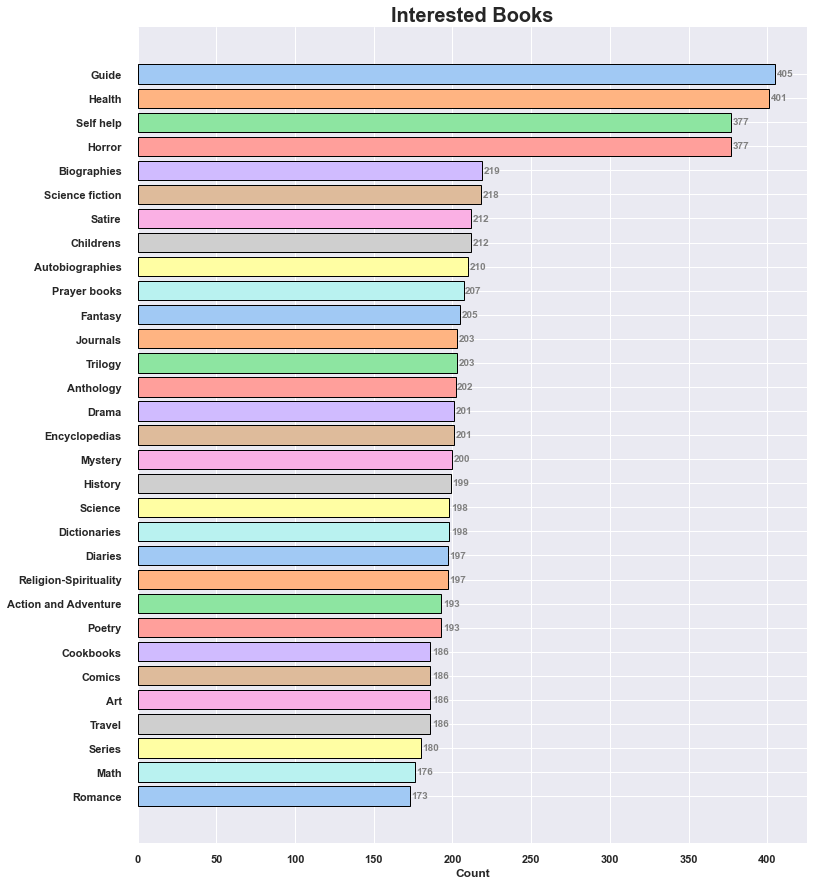

In [46]:
# Figure Size
fig, ax = plt.subplots(figsize=(12,15))

# Horizontal Bar Plot
title_cnt=df["Interested Type of Books"].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('pastel',len(title_cnt)))



# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Interested Books',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()

In [47]:
print(df["certifications"].value_counts())

r programming           803
information security    785
shell programming       783
machine learning        783
full stack              768
hadoop                  764
python                  756
distro making           740
app development         719
Name: certifications, dtype: int64


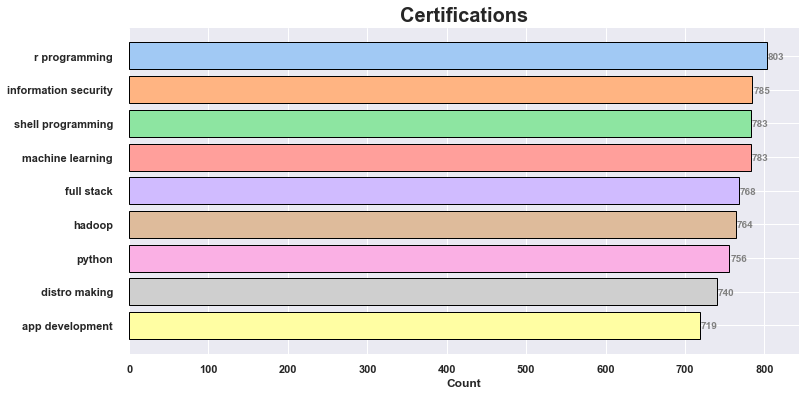

In [48]:
# Figure Size
fig, ax = plt.subplots(figsize=(12,6))

# Horizontal Bar Plot
title_cnt=df.certifications.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('pastel',len(title_cnt)))



# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Certifications',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()

In [49]:
print(df["workshops"].value_counts())

database security    897
system designing     891
web technologies     891
hacking              867
testing              852
data science         842
game development     831
cloud computing      830
Name: workshops, dtype: int64


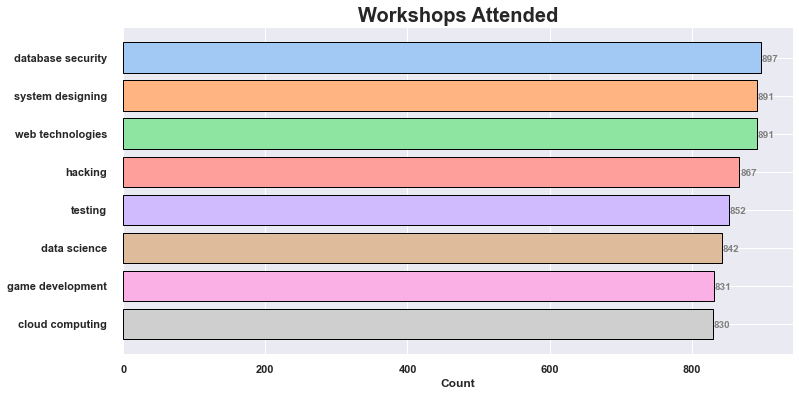

In [50]:
# Figure Size
fig, ax = plt.subplots(figsize=(12,6))

# Horizontal Bar Plot
title_cnt=df.workshops.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('pastel',len(title_cnt)))



# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Workshops Attended',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()

In [51]:
print(df["Type of company want to settle in?"].value_counts())

Service Based                        725
Web Services                         719
BPA                                  711
Testing and Maintainance Services    698
Product based                        695
Finance                              694
Cloud Services                       692
product development                  669
Sales and Marketing                  658
SAaS services                        640
Name: Type of company want to settle in?, dtype: int64


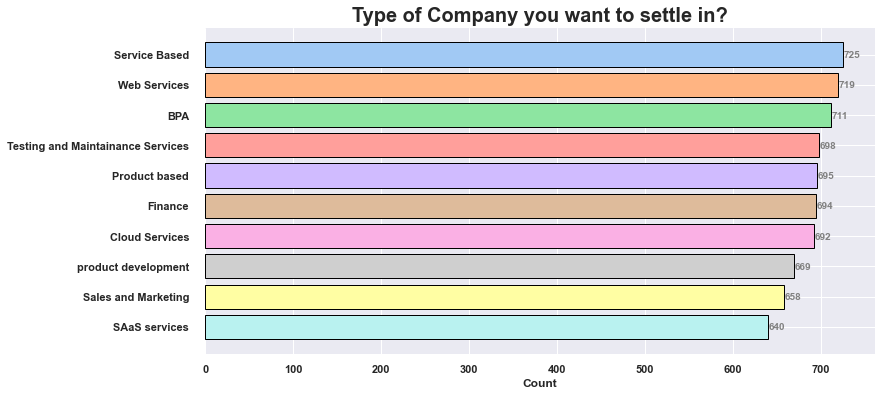

In [52]:
# Figure Size
fig, ax = plt.subplots(figsize=(12,6))

# Horizontal Bar Plot
title_cnt=df["Type of company want to settle in?"].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('pastel',len(title_cnt)))



# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Type of Company you want to settle in?',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()

In [53]:
print(df["interested career area "].value_counts())

system developer            1178
security                    1177
Business process analyst    1154
developer                   1145
testing                     1128
cloud computing             1119
Name: interested career area , dtype: int64


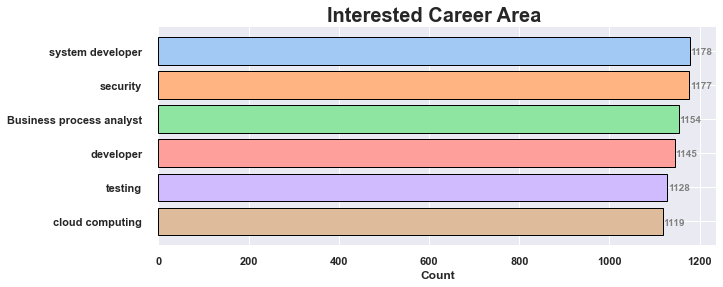

In [54]:
# Figure Size
fig, ax = plt.subplots(figsize=(10,4)) #width,height

# Horizontal Bar Plot
title_cnt=df["interested career area "].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('pastel',len(title_cnt)))



# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Interested Career Area ',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()